In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('/content/netflix.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [3]:
df.drop(columns=['show_id'], inplace=True)

In [5]:
df.dropna(subset=['rating', 'date_added'], inplace=True)

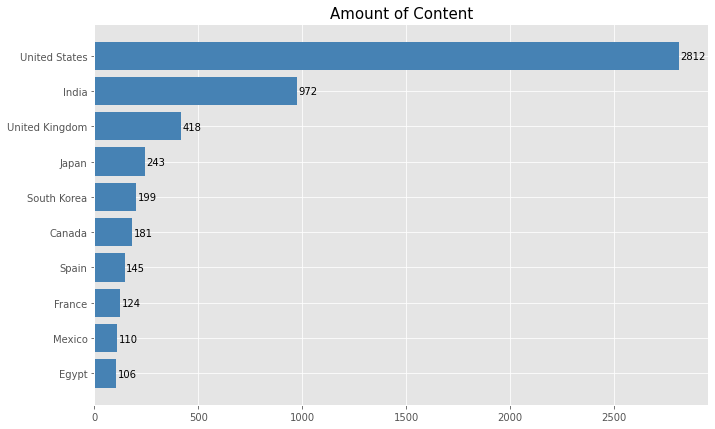

In [6]:
df_content = df.groupby('country').count().sort_values('type', ascending=False)
df_content.reset_index(inplace=True)

#PLOT
plt.style.use('ggplot')
fig1, ax1 = plt.subplots(figsize=(11,7))
#define x, y
x_content = df_content[['country', 'type']].head(10)['type']
y_content = df_content[['country', 'type']].head(10)['country']
#plot
ax1.barh(y_content, x_content, color='steelblue')
#sort bars ASC
plt.gca().invert_yaxis()
#annotate values
for i, v in enumerate(x_content):
    ax1.text(v+8, i+0.1, str(v))
    
#labels
ax1.set_title('Amount of Content', fontsize=15)
plt.show()

Type of Content

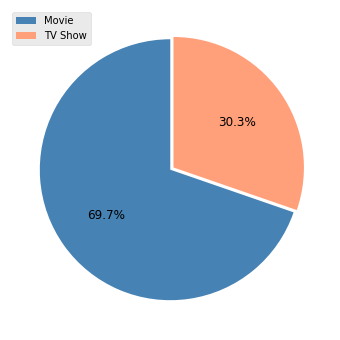

In [7]:
content_type = df.groupby('type').count()
content_type.reset_index(inplace=True)
content_type = content_type[['type', 'title']]
content_type.columns = ['type', 'count']

#PLOT
fig2, ax2 = plt.subplots(figsize=(25, 6))
colors = ['steelblue', 'lightsalmon']
#plot
ax2.pie(x=content_type['count'], startangle=90, explode=(0, 0.03), colors=colors, autopct='%1.1f%%', textprops={'fontsize': 12})
#labels
ax2.legend(labels=content_type['type'], loc='upper left')
plt.show()

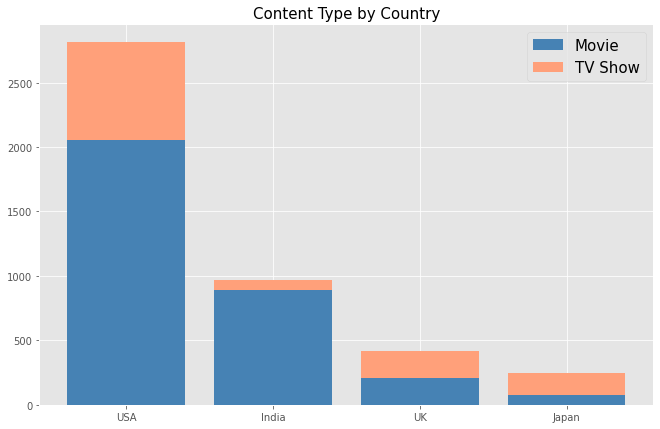

In [8]:
df_country = df[~df['country'].isna()]
countries = ['United States', 'India', 'United Kingdom', 'Japan']

#CREATE COUNTRY DF's
def country_type(country):
    df_country_type = df_country[df_country['country'] == country]
    df_country_type = df_country_type.groupby('type').count()
    df_country_type.reset_index(inplace=True)
    df_country_type = df_country_type[['type', 'title']]
    df_country_type.columns = ['type', 'count']
    return df_country_type


usa_type = country_type('United States')
india_type = country_type('India')
uk_type = country_type('United Kingdom')
japan_type = country_type('Japan')

#PLOT
color1 = 'steelblue'
color2 = 'lightsalmon'
fig3, ax3 = plt.subplots(figsize=(11, 7))
#plot
ax3.bar(x='USA', height=usa_type.iloc[0][1], color=color1)
ax3.bar(x='USA', height=usa_type.iloc[1][1], bottom=usa_type.iloc[0][1], color=color2)
ax3.bar(x='India', height=india_type.iloc[0][1], color=color1)
ax3.bar(x='India', height=india_type.iloc[1][1], bottom=india_type.iloc[0][1], color=color2)
ax3.bar(x='UK', height=uk_type.iloc[0][1], color=color1)
ax3.bar(x='UK', height=uk_type.iloc[1][1], bottom=uk_type.iloc[0][1], color=color2)
ax3.bar(x='Japan', height=japan_type.iloc[0][1], color=color1)
ax3.bar(x='Japan', height=japan_type.iloc[1][1], bottom=japan_type.iloc[0][1], color=color2)
#labels
ax3.legend(labels=usa_type['type'], loc='upper right', prop={'size': 15})
ax3.set_title('Content Type by Country', fontsize=15)
plt.show()

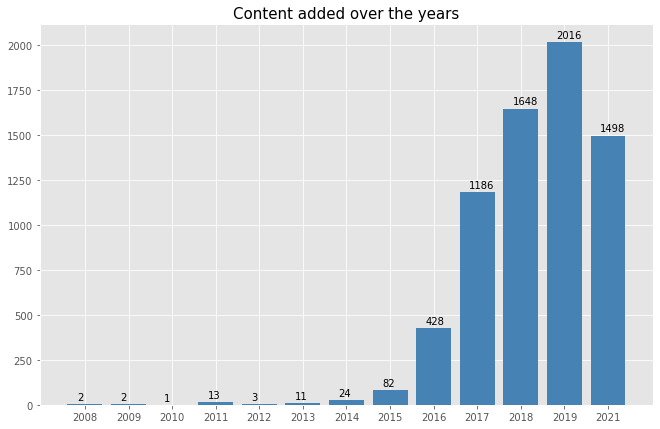

In [18]:
#FORMAT
df['date_added'] = df['date_added'].str.replace(',', '')
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d %Y')
df['date_added'] = df['date_added'].dt.strftime('%m/%d/%Y')
#df['date_added'] = pd.to_datetime(df['date_added'], format='%m/%d/%Y')

#CREATE DF
df['year'] = df['date_added'].str.split('/').str[2]
df_without_2020 = df[~(df['year']=='2020')]
df_added = df_without_2020.groupby('year').agg('count')
df_added.reset_index(inplace=True)
df_added = df_added[['year', 'type']]

#PLOT
fig6, ax6 = plt.subplots(figsize=(11,7))
#plot
ax6.bar(df_added['year'], df_added['type'], color='steelblue')
#annotate values
for a,b in zip(df_added['year'], df_added['type']): 
    plt.annotate(str(b), xy=(a, b), xytext=(-8,4), textcoords='offset points')
#labels
ax6.set_title('Content added over the years', fontsize=15)
plt.show()

TypeError: ignored

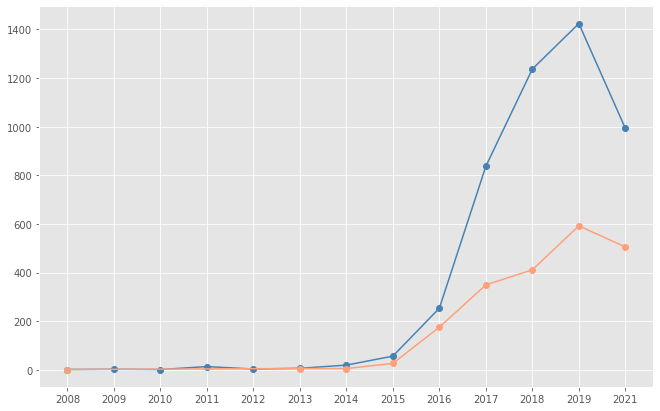

In [20]:
#CREATE DF's
df3 = df_without_2020[df_without_2020['type'] == 'Movie']
df4 = df_without_2020[df_without_2020['type'] == 'TV Show']
x3 = df3.groupby('year').agg('count')
x3.reset_index(inplace=True)
x4 = df4.groupby('year').agg('count')
x4.reset_index(inplace=True)

#PLOT
fig7, ax7 = plt.subplots(figsize=(11, 7))
#plot
ax7.plot(x3['year'], x3['type'], 'o-', color='steelblue')
ax7.plot(x4['year'], x4['type'], 'o-', color='lightsalmon')
#define max values
y_max_movies = max(x3['type'])
y_max_tv = max(x4['type'])
x_max_movies = x3.iloc[x3['type'].idxmax]['year']
x_max_tv = x4.iloc[x4['type'].idxmax]['year']
#annotate max values
plt.annotate(str(y_max_movies), xy=(x_max_movies, y_max_movies), xytext=(0,5), textcoords='offset points')
plt.annotate(str(y_max_tv), xy=(x_max_tv, y_max_tv), xytext=(0,5), textcoords='offset points')
#labels
plt.yticks(np.arange(0, y_max_movies, step=200))
ax7.legend(labels=['Movies', 'TV Shows'], loc='lower right', prop={'size': 13})
ax7.set_title('Movies/TV Shows added over the years', fontsize=15)
plt.show()

Some of the oldest movie


In [21]:
df_oldest_movies = df.sort_values('release_year')[['type', 'title', 'release_year']]
df_oldest_movies[df_oldest_movies['type'] == 'Movie']
df_oldest_movies = df_oldest_movies[['title', 'release_year']]
df_oldest_movies.head(10)

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
8205,The Battle of Midway,1942
7790,Prelude to War,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8763,WWII: Report from the Aleutians,1943
8739,Why We Fight: The Battle of Russia,1943
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
8640,Tunisian Victory,1944
1331,Five Came Back: The Reference Films,1945


Some of the oldest Tv shows

In [22]:
df_oldest_shows = df.sort_values('release_year')[['type', 'title', 'release_year']]
df_oldest_shows[df_oldest_shows['type'] == 'TV Show']
df_oldest_shows = df_oldest_shows[['title', 'release_year']]
df_oldest_shows.head(10)

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
8205,The Battle of Midway,1942
7790,Prelude to War,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8763,WWII: Report from the Aleutians,1943
8739,Why We Fight: The Battle of Russia,1943
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
8640,Tunisian Victory,1944
1331,Five Came Back: The Reference Films,1945


Actors with the most content

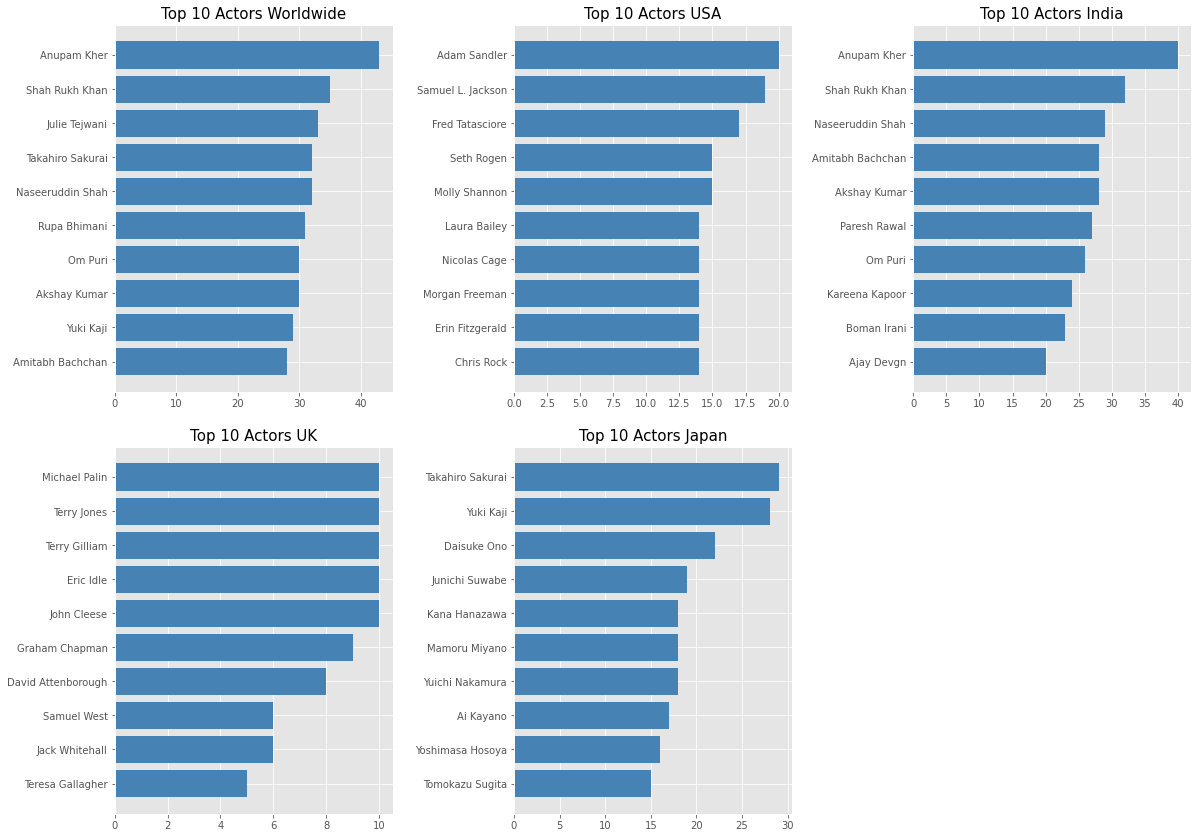

In [23]:
df_cast = df[~df['cast'].isna()]
cast = ', '.join(str(v) for v in df_cast['cast'])
cast = cast.split(', ') 
cast_list = []
for x in cast:
    cast_list.append((x.strip(), cast.count(x)))
cast_list = sorted(cast_list, key=lambda x: x[1], reverse=True)
cast_list = list(dict.fromkeys(cast_list))

#CREATE DF's
#all countries
df_cast_all = pd.DataFrame(cast_list, columns=('actor', 'count'))
df_cast_all = df_cast_all.head(10)
df_cast_all.sort_values('count', inplace=True)
#countries
def country_cast(country):
    df_country_cast = df_cast[df_cast['country'] == country]
    df_country_cast = ', '.join(str(v) for v in df_country_cast['cast'])
    df_country_cast = df_country_cast.split(', ')
    cast_list1 = []
    for x in df_country_cast:
        cast_list1.append((x.strip(), df_country_cast.count(x)))
    cast_list1 = sorted(cast_list1, key=lambda x: x[1], reverse=True)
    cast_list1 = list(dict.fromkeys(cast_list1))
    cast_list1 = pd.DataFrame(cast_list1, columns=('actor', 'count'))
    cast_list1 = cast_list1.head(10)
    cast_list1.sort_values('count', inplace=True)
    return cast_list1

df_cast_usa = country_cast('United States')
df_cast_india = country_cast('India')
df_cast_uk = country_cast('United Kingdom')
df_cast_japan = country_cast('Japan')

#PLOT
fig15, ax15 = plt.subplots(2, 3, figsize=(17,12))
ax15[0, 0].barh(df_cast_all['actor'], df_cast_all['count'], color='steelblue')
ax15[0, 0].set_title('Top 10 Actors Worldwide', fontsize=15)

ax15[0, 1].barh(df_cast_usa['actor'], df_cast_usa['count'], color='steelblue')
ax15[0, 1].set_title('Top 10 Actors USA', fontsize=15)

ax15[0, 2].barh(df_cast_india['actor'], df_cast_india['count'], color='steelblue')
ax15[0, 2].set_title('Top 10 Actors India', fontsize=15)

ax15[1, 0].barh(df_cast_uk['actor'], df_cast_uk['count'], color='steelblue')
ax15[1, 0].set_title('Top 10 Actors UK', fontsize=15)

ax15[1, 1].barh(df_cast_japan['actor'], df_cast_japan['count'], color='steelblue')
ax15[1, 1].set_title('Top 10 Actors Japan', fontsize=15)

ax15[1, 2].axis('off')

fig15.tight_layout(pad=2)

Average movie duration

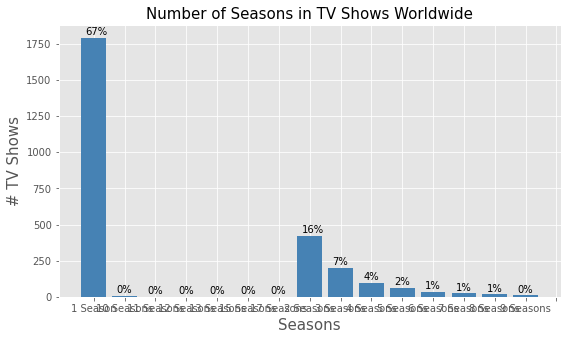

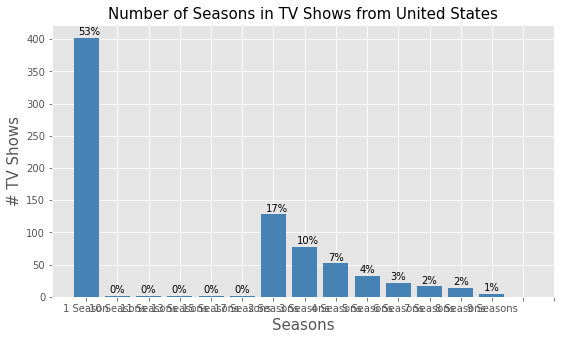

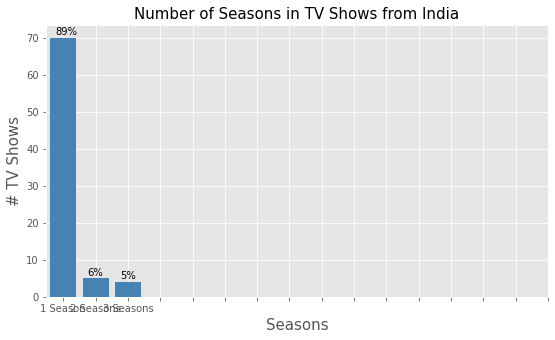

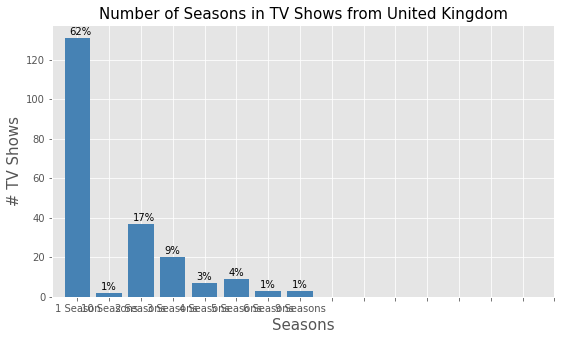

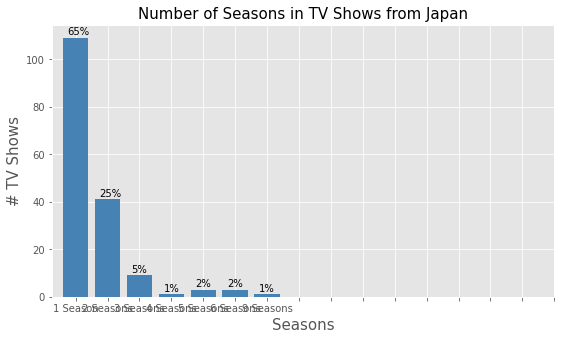

In [26]:
#CREATE DF's
df_shows = df[df['type'] == 'TV Show']
df_shows['duration'].value_counts()

#all countries
df_seasons_all = df_shows.groupby('duration').count()
df_seasons_all.reset_index(inplace=True)
df_seasons_all = df_seasons_all[['duration', 'type']]
df_seasons_all.columns = ['seasons', 'count']
#countries
def country_seasons(country):
    df_country_seasons = df[(df['country'] == country) & (df['type'] == 'TV Show')]
    df_country_seasons = df_country_seasons.groupby('duration').count()
    df_country_seasons.reset_index(inplace=True)
    df_country_seasons = df_country_seasons[['duration', 'type']]
    df_country_seasons.columns = ['seasons', 'count']
    return df_country_seasons

#PLOT
#all countries
fig11, ax11 = plt.subplots(figsize=(9, 5))
#plot
ax11.bar(df_seasons_all['seasons'], df_seasons_all['count'], color='steelblue')
#annotate values
for a,b in zip(df_seasons_all['seasons'], df_seasons_all['count']): 
    plt.annotate('{:.0f}%'.format(round(int(b)/df_seasons_all['count'].sum()*100)), xy=(a, b), xytext=(-8,3), textcoords='offset points', fontsize = 10)

#labels
plt.xticks(np.arange(0, 16, step=1))
ax11.set_title('Number of Seasons in TV Shows Worldwide', fontsize=15)
ax11.set_ylabel('# TV Shows', fontsize=15)
ax11.set_xlabel('Seasons', fontsize=15)
#countries
for x in range(4):
    for y in range(1):
        df_count_sea = country_seasons(countries[x])
        fig12, ax12 = plt.subplots(figsize=(9, 5))
        #plot
        ax12.bar(df_count_sea['seasons'], df_count_sea['count'], color='steelblue')
        #annotate values
        for a,b in zip(df_count_sea['seasons'], df_count_sea['count']): 
            plt.annotate('{:.0f}%'.format(round(int(b)/df_count_sea['count'].sum()*100)), xy=(a, b), xytext=(-8,3), textcoords='offset points', fontsize = 10)

        #labels
        ax12.set_title('Number of Seasons in TV Shows from '+countries[x], fontsize=15)
        #ax12.set_ylabel('Relative Distribution', fontsize=15)
        ax12.set_xlabel('Seasons', fontsize=15)
        ax12.set_ylabel('# TV Shows', fontsize=15)
        #ax12.legend(labels=['duration', 'average duration'],loc='upper right', prop={'size': 15})
        plt.xticks(np.arange(0, 16, step=1))
plt.show()

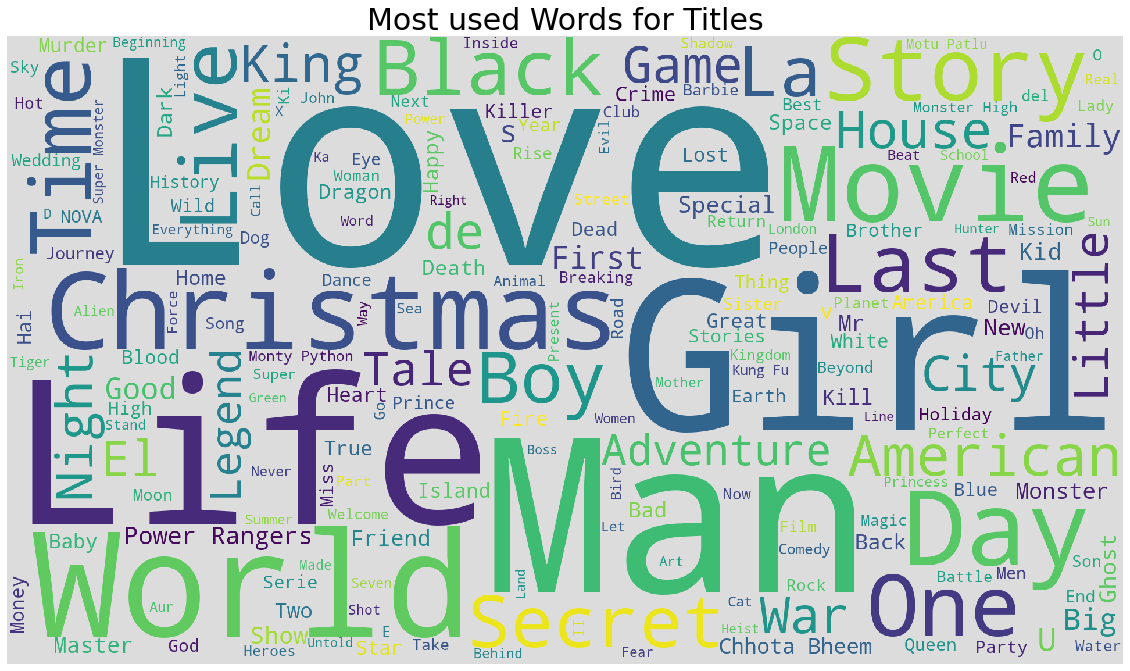

In [28]:
#CREATE WORDCLOUD
words = ' '.join(str(v) for v in df['title'])
wordcloud = WordCloud(max_words=200, width=1920, height=1080, background_color='gainsboro').generate(words)
#PLOT
fig16, ax16 = plt.subplots(figsize=(20,15))
#plot
ax16.imshow(wordcloud, interpolation='None')
#labels
ax16.set_title('Most used Words for Titles',fontsize = 30)
ax16.axis("off")
plt.show()